In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

os.chdir('../ao3_data/tfidf_merged_chs_20211216_no_crossover/')

In [2]:
all_tfidf_df = None
# loop through every file in current directory
# and concatenate each data frame into all_tfidf_df

for file in os.listdir():
    if file.endswith('.tsv'):
        tfidf_df = pd.read_csv(file, sep='\t')
        if all_tfidf_df is None:
            all_tfidf_df = tfidf_df
        else:
            all_tfidf_df = pd.concat([all_tfidf_df, tfidf_df], ignore_index=True)

In [3]:
all_tfidf_df['Cos'].median()

0.2642774105439776

In [16]:
all_tfidf_df['Cos'].max()

0.9942193485483104

In [4]:
temp_for_viz_df = all_tfidf_df.copy()

def remove_0_and_nan_values(df, novelty):
    # remove 0 and  nan values
    df.dropna(subset=[novelty, 'Kudos', 'Hits'],inplace=True)
    df = df[df[novelty] != 0]
    df = df[df['Kudos'] != 0]
    df = df[df['Hits'] != 0]
    return df

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['Cos'] > 0.3:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [5]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

303483 217247


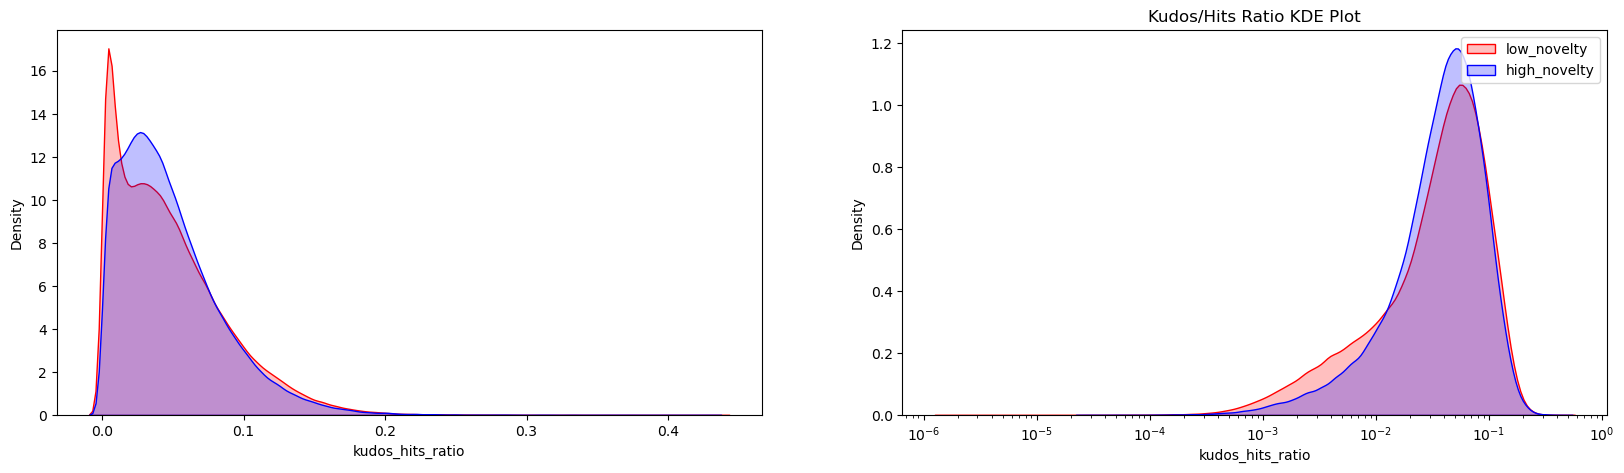

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

In [7]:
temp_for_viz_df = all_tfidf_df.copy()
temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['Cos'] > 0.5:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [8]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

467007 53723


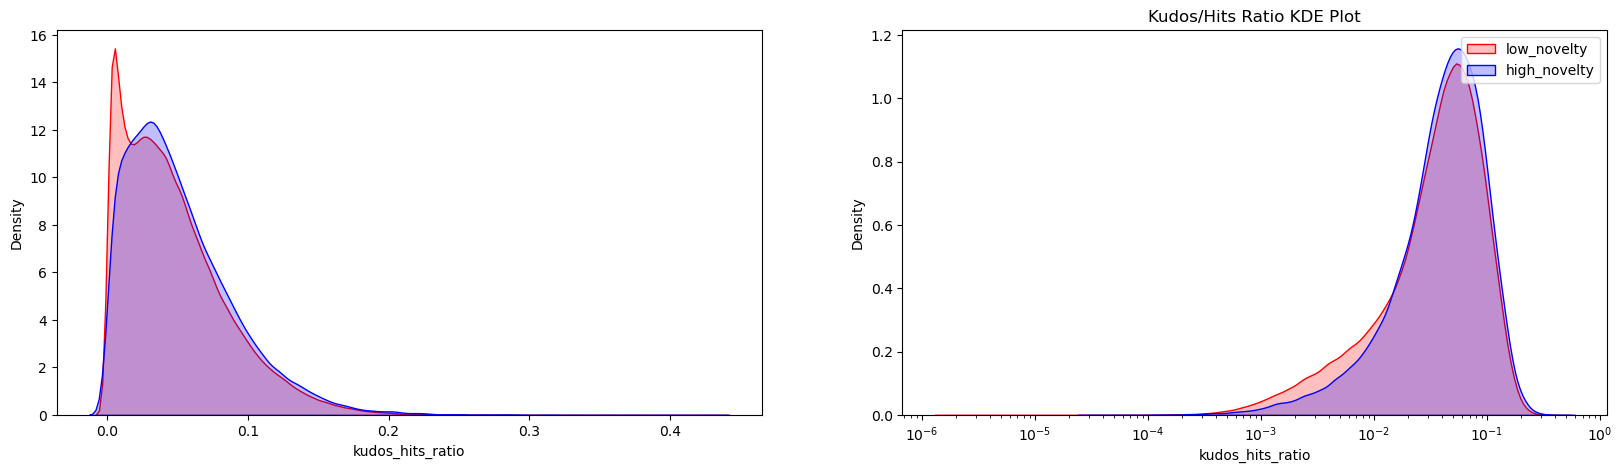

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

In [10]:
os.chdir('../lda_merged_chs_20211216_no_crossover/')

In [11]:
all_lda_df = None

# loop through every file in current directory
# and concatenate each data frame into all_lda_df

for file in os.listdir():
    if file.endswith('.tsv'):
        lda_df = pd.read_csv(file, sep='\t')
        if all_lda_df is None:
            all_lda_df = lda_df
        else:
            all_lda_df = pd.concat([all_lda_df, lda_df], ignore_index=True)
            
# print the mean of the JSD values
all_lda_df['JSD'].median()

0.35720671324855147

In [15]:
all_lda_df['JSD'].max()

0.692548066912309

In [12]:
temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['JSD'] > 0.4:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [13]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

320248 200482


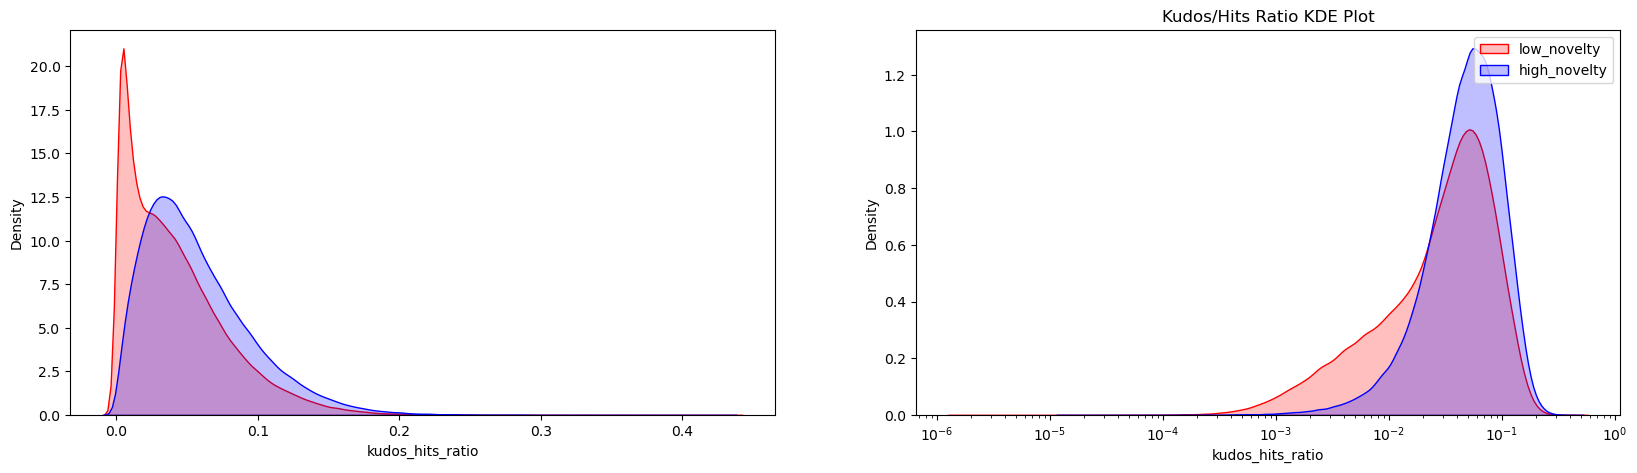

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()

In [17]:
temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    if row['JSD'] > 0.5:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'high_novelty'
    else:
        temp_for_viz_df.loc[index, 'novelty_category'] = 'low_novelty'
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']

print(len(temp_for_viz_df))

520730


In [18]:
# count low novelty and high novelty
low = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'low_novelty']
high = temp_for_viz_df[temp_for_viz_df['novelty_category'] == 'high_novelty']
print(len(low), len(high))

442112 78618


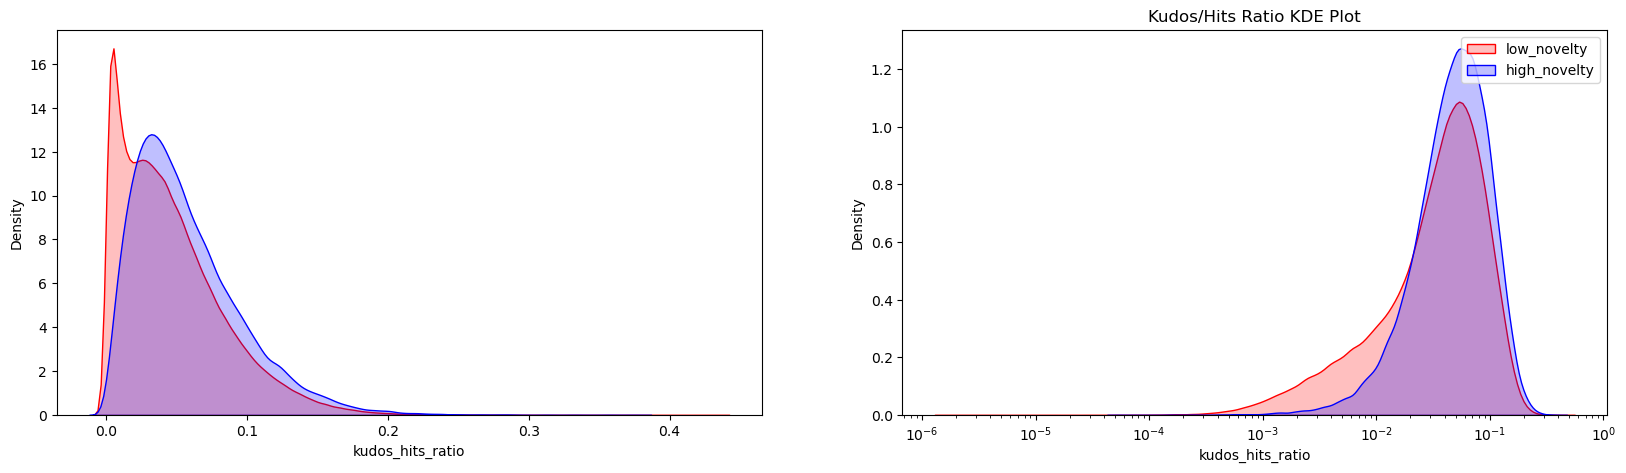

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend()